# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [13]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)


In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images_flat.shape

(60000, 784)

## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [17]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(train_images_flat, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [19]:

#softmax regression
model_softmax = models.Sequential()
model_softmax.add(layers.Flatten(input_shape=(28, 28)))
model_softmax.add(layers.Dense(10, activation='softmax'))

model_softmax.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

In [24]:
#predict and visualize
predictions = model_softmax.predict(test_images)
predicted_softmax = np.argmax(predictions, axis=1)

predictions_logistic = model_logistic.predict(test_images_flat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
accuracy = accuracy_score(test_labels, predicted_softmax)
print(f"Softmax Regression Accuracy: {accuracy * 100:.2f}%")

accuracy_logistic = accuracy_score(test_labels, predictions_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")

Softmax Regression Accuracy: 13.00%
Logistic Regression Accuracy: 84.39%


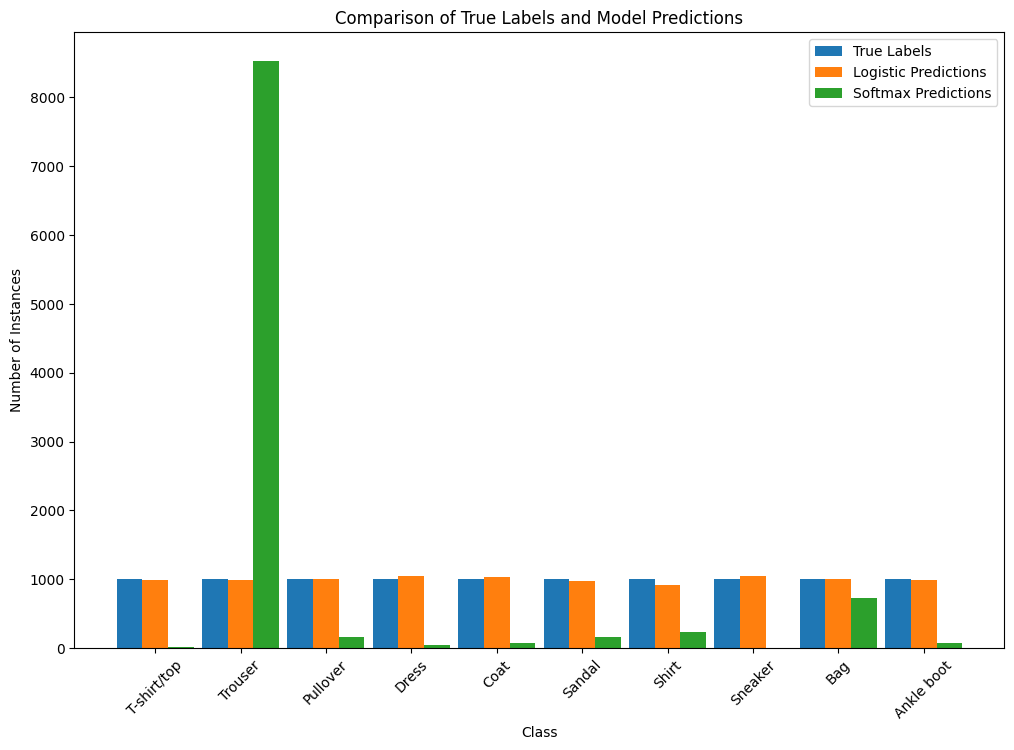

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

true_labels_distribution = np.bincount(test_labels, minlength=10)
logistic_pred_distribution = np.bincount(predictions_logistic, minlength=10)
softmax_pred_distribution = np.bincount(predicted_softmax, minlength=10)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x = np.arange(len(class_names))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, true_labels_distribution, width, label='True Labels')
rects2 = ax.bar(x, logistic_pred_distribution, width, label='Logistic Predictions')
rects3 = ax.bar(x + width, softmax_pred_distribution, width, label='Softmax Predictions')

ax.set_xlabel('Class')
ax.set_ylabel('Number of Instances')
ax.set_title('Comparison of True Labels and Model Predictions')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()



### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.